In [1]:
import numpy as np
#import matplotlib.pyplot as plt
import os
import cv2

In [2]:
#importing drive
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
import glob
import matplotlib

In [ ]:
#os.chdir('C:\\Users\\16101201\\Desktop\\test\\') #For Colab : /content/gdrive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/All Image seq with video

# For Ratul
#os.chdir('/content/gdrive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/Finger Surface Videos')

# For Sadik
#os.chdir('/content/gdrive/My Drive/BRACU Access/Thesis Access/Defense/Image Sequence Processing Footage/All Image seq with video')

# For Nakib
os.chdir('/content/gdrive/My Drive/Thesis/Thesis Access/Defense/Image Sequence Processing Footage')

CATEGORIES = glob.glob('*')
print(CATEGORIES)
# os.chdir('..')

['HemoglobinDataset.csv.gsheet', 'code', '01 Test @ Thesis Lab', '02 National Cancer Institute', '03 sadik haat same angul', '04 NCI (2nd Phase)', '05 NCI (3rd Phase) ', 'check point', '06 Students of BRACU', 'Finger Surface Videos']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(len(CATEGORIES))

10


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
IMG_SIZE = 64

In [ ]:
class_label = [1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print (str(len(class_label)))

85


In [ ]:
#DATADIR = 'C:\\Users\\16101201\\Desktop\\test\\'

# For Ratul
# DATADIR = '/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/All Image seq with video'

# For Sadik
# DATADIR = '/content/gdrive/My Drive/BRACU Access/Thesis Access/Defense/Image Sequence Processing Footage/All Image seq with video'

# For Nakib
DATADIR ='/content/gdrive/My Drive/Thesis/Thesis Access/Defense/Image Sequence Processing Footage'


In [ ]:
training_data = []

def create_training_data():
    i = 0
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        print(path)
        class_num = class_label[i]
        if not path.endswith('.mp4'): #ignoring the video files
          for img in os.listdir(path):
              try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                print(img_array)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
              except:
                print('error')
                pass
          i+=1
create_training_data()

/content/gdrive/My Drive/Thesis/Thesis Access/Defense/Image Sequence Processing Footage/HemoglobinDataset.csv.gsheet


OSError: ignored

In [ ]:
type(training_data)

list

In [ ]:
np.save('/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/data.npy', training_data)

In [ ]:
#load data from drive
data = np.load('/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/data.npy',allow_pickle=True)
training_data = data.tolist()
type(training_data)

list

In [ ]:
len(training_data)
training_data

In [ ]:
training_data[2000][1]

1

In [ ]:
#saving training data
import h5py

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
X = X/255.0

In [ ]:
X.shape

(58258, 64, 64, 1)

In [ ]:
Y = np.array(y)

In [ ]:
np.savez_compressed('/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/', a=X, b=Y)

In [ ]:
#LOAD SAVED DATA
X = np.load('/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/X.npy')
Y = np.load('/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/Y.npy')
print(len(X))

29366


[1 1 0 ... 1 1 1]
[[[0.29803922]
  [0.29803922]
  [0.29803922]
  ...
  [0.29803922]
  [0.29803922]
  [0.29803922]]

 [[0.29803922]
  [0.29803922]
  [0.29803922]
  ...
  [0.29803922]
  [0.29803922]
  [0.29803922]]

 [[0.29803922]
  [0.29803922]
  [0.29803922]
  ...
  [0.29803922]
  [0.29803922]
  [0.29803922]]

 ...

 [[0.29803922]
  [0.29803922]
  [0.29803922]
  ...
  [0.29803922]
  [0.33333333]
  [0.29803922]]

 [[0.29803922]
  [0.29803922]
  [0.29803922]
  ...
  [0.29803922]
  [0.41176471]
  [0.29803922]]

 [[0.29803922]
  [0.29803922]
  [0.29803922]
  ...
  [0.30588235]
  [0.41176471]
  [0.30588235]]]


TypeError: ignored

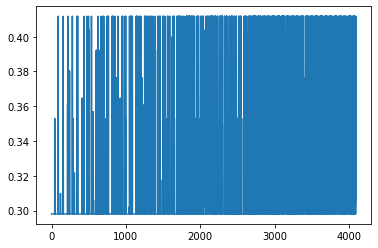

In [ ]:
print(Y)

i=0
#X = X.astype(int)
for x in X:
  print(x)
  plt.plot(x.flat)
  plt.axis(i)
  plt.show()
  i=i+1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import optimizers


!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from keras.models import model_from_json

Using TensorFlow backend.


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-4qrmthl7
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-4qrmthl7
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80479 sha256=98694342216c5ca8d623551754ee1eaa0eb442fc4bfc9cdcd532fe5d1df80547
  Stored in directory: /tmp/pip-ephem-wheel-cache-tb2691z2/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

NameError: ignored

In [ ]:
# The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

adam = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(X, Y, batch_size = 64, epochs=1000, validation_split=0.2)

Train on 23303 samples, validate on 5826 samples
Epoch 1/1000
23303/23303 [==============================] - 3s 144us/sample - loss: 0.1787 - acc: 0.9218 - val_loss: 0.2047 - val_acc: 0.9109
Epoch 2/1000
23303/23303 [==============================] - 3s 143us/sample - loss: 0.1739 - acc: 0.9225 - val_loss: 0.2042 - val_acc: 0.9130
Epoch 3/1000
23303/23303 [==============================] - 3s 143us/sample - loss: 0.1690 - acc: 0.9251 - val_loss: 0.2029 - val_acc: 0.9159
Epoch 4/1000
23303/23303 [==============================] - 3s 143us/sample - loss: 0.1650 - acc: 0.9268 - val_loss: 0.2016 - val_acc: 0.9135
Epoch 5/1000
23303/23303 [==============================] - 3s 143us/sample - loss: 0.1643 - acc: 0.9272 - val_loss: 0.2017 - val_acc: 0.9137
Epoch 6/1000
23303/23303 [==============================] - 3s 143us/sample - loss: 0.1603 - acc: 0.9285 - val_loss: 0.1996 - val_acc: 0.9131
Epoch 7/1000
23303/23303 [==============================] - 3s 144us/sample - loss: 0.1545 - acc: 0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
example_result = model.predict_classes(X)
# example_result = np.array(example_result)
#result = example_result.astype(int)
result = example_result
result
#type(example_result)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
#SAVE THE MODEL
# serialize model to JSON
!sudo pip install h5py

model_json = model.to_json()
with open("/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

OSError: ignored

In [ ]:
def confusionMatrix(Y,result):
  #Confusion matrix, Accuracy, sensitivity and specificity
  from sklearn.metrics import confusion_matrix

  #tn, fp, fn, tp = confusion_matrix(Y, result).ravel()

  cm1 = confusion_matrix(Y,result)
  print('Confusion Matrix : \n', cm1)

  total1=sum(sum(cm1))
  #####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Specificity : ', specificity1)

confusionMatrix(Y,result)

NameError: ignored

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y, model.predict_proba(X))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
# !pip install ggplot
# !pip install pandas-compat
# import pandas as pd

# import ggplot
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
import sklearn

# from sklearn.datasets import make_classification
# from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("f1_score: ",f1_score(Y, model.predict_classes(X), average="macro"))
print("precision_score: ",precision_score(Y, model.predict_classes(X), average="macro"))
print("recall_score: ",recall_score(Y, model.predict_classes(X), average="macro"))    

NameError: ignored

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


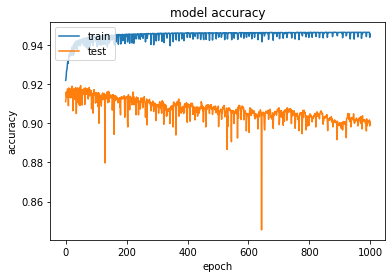

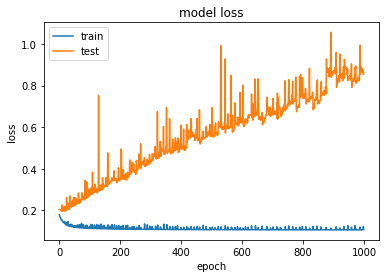

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
keras_file = '/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/model.h5'
keras.models.save_model(loaded_model,keras_file)

In [ ]:
import tensorflow.contrib
converter = tensorflow.lite.TocoConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/converted_model.tflite", "wb").write(tflite_model)
#open("/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


3363612

In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="/content/drive/My Drive/Thesis Access/Defense/Image Sequence Processing Footage/check point/converted_model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])  # Example: [1 224 224 3]
print(interpreter.get_input_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])  # Example: [1 1000]
print(interpreter.get_output_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

[ 1 64 64  1]
<class 'numpy.float32'>
[1 1]
<class 'numpy.float32'>
